# Backtesting with [BT](https://pmorissette.github.io/bt/#what-is-bt)

In [64]:
import bt
import matplotlib
import pandas as pd
%matplotlib inline

In [65]:
# Get prices from Yahoo Finance
data = bt.get('spy,agg,qqq', start='2010-01-01')
data.head()

,spy,agg,qqq
Date,,,
2010-01-04,89.610825,75.210106,41.320522
2010-01-05,89.848068,75.552284,41.320522
2010-01-06,89.911308,75.508583,41.071289
2010-01-07,90.290848,75.421234,41.097996
2010-01-08,90.591301,75.464890,41.436241


In [71]:
# Create the BT strategy with Quarterly rebalancing and specified asset weights
# For the list of available strategies see BT documentation)
fixed_weights = bt.Strategy('fixed_weights', [bt.algos.RunQuarterly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(spy=0.6,agg=0.3,qqq=0.10),
                       bt.algos.Rebalance()])

In [72]:
# Create the BT strategy with Quarterly rebalancing and Mean-Var optimization
mean_var = bt.Strategy('mean_var', [bt.algos.RunQuarterly(),
                       bt.algos.RunAfterDate('2010-01-04'),
                       bt.algos.SelectAll(),
                       bt.algos.WeighMeanVar(),
                       bt.algos.Rebalance()])

In [73]:
# Create a backtest and run it
test = bt.Backtest(fixed_weights, data)
test2 = bt.Backtest(mean_var, data)
res = bt.run(test,test2)

<AxesSubplot:title={'center':'Fixed Weights vs Mean-Var Strategy'}>

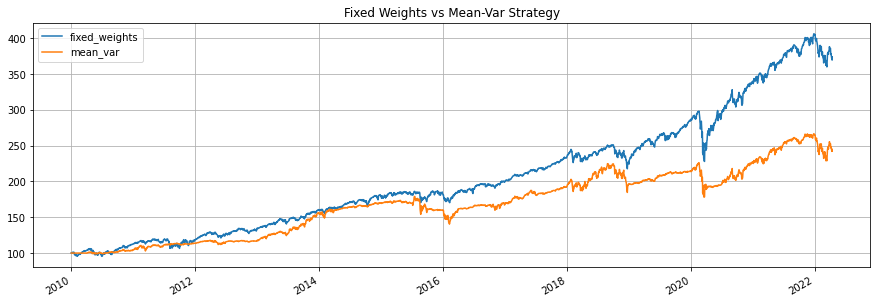

In [74]:
res.plot(grid=True, title='Fixed Weights vs Mean-Var Strategy')

In [75]:
# Display lookback returns
res.display_lookback_returns()

,fixed_weights,mean_var
mtd,-3.34%,-3.12%
3m,-6.46%,-5.76%
6m,-3.55%,-5.56%
ytd,-8.53%,-8.59%
1y,2.47%,0.58%
3y,12.97%,6.23%
5y,12.15%,6.55%
10y,11.32%,7.68%
incep,11.24%,7.47%


In [77]:
# Display monthly returns from backtest
res.display_monthly_returns(backtest='fixed_weights')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010  -3.54   2.34   4.37   1.45  -5.18  -3.03   5.1   -2.9    6.69   2.98  -0.26   4.34  12.13
  2011   1.68   2.5   -0.1    2.5   -0.43  -1.34  -0.52  -3.28  -4.19   7.87  -0.62   0.96   4.59
  2012   3.88   3.27   2.33  -0.22  -3.95   2.71   1.22   2.02   1.7   -1.63   0.55   0.41  12.7
  2013   3.13   0.98   2.64   1.69   1.19  -1.51   3.81  -2.1    2.74   3.53   2.08   1.72  21.59
  2014  -1.87   3.32   0.17   0.64   2.19   1.53  -0.76   3.21  -1.09   2.01   2.32  -0.34  11.75
  2015  -1.38   3.76  -1.08   0.69   0.87  -1.8    2.07  -4.45  -1.47   6.25   0.18  -1.28   1.96
  2016  -3.35   0.07   4.9   -0      1.45   0.56   3.06   0.12   0.25  -1.43   1.47   1.42   8.62
  2017   1.66   3      0.27   1.14   1.45   0.14   1.74   0.67   1      1.9    2      0.94  17.07
  2018   3.92  -2.64 

In [78]:
# Display monthly returns from backtest
res.display_monthly_returns(backtest='mean_var')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010   0      0      0      0.98  -1.38  -0.01   0.76   1.29   0.01   1.93  -0.64   0.96   3.93
  2011   1.68   3.32  -0.22   2.17   0.1   -1.04   1.75   0.68  -0.09  -0.21  -0.33   1.36   9.46
  2012   1.33   1.29   0.59  -0.47  -3.1    1.78   1.42   0      0.27  -0.71   0.37   0.02   2.73
  2013   3.14   1.28   3.8    1.14   0.01  -1.46   6.03  -0.4    4.83   4.96   3.55   2.93  33.86
  2014  -2.59   4.87  -1.09   2.01   1.44   0.44  -0.49   2.07  -0.81   1.33   1.57  -0.43   8.42
  2015   0.74   0.68  -0.12   0.04   0.03  -1.33   3.66  -6.82  -2.21   0.44  -0.39  -0.19  -5.65
  2016  -4.94  -1.57   6.85   1.34   0.2    1.75   1.06  -0.16   0.04  -1.45   0.44   1.13   4.39
  2017   1.92   3.93   0.12   1.8    2.76  -1.52   0.36   0.66   0.56   1.59   1.2    0.73  14.94
  2018   4.33  -2.91

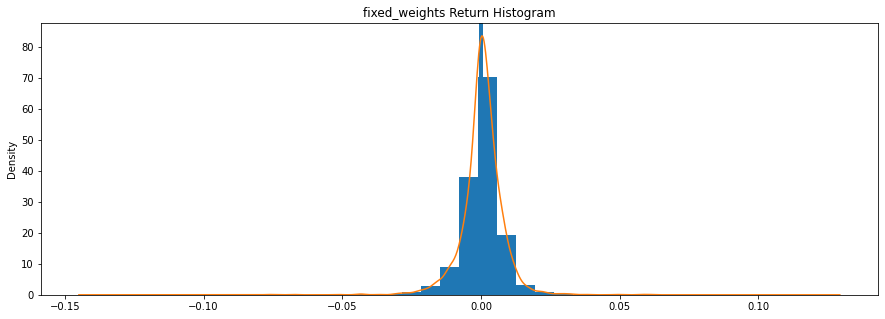

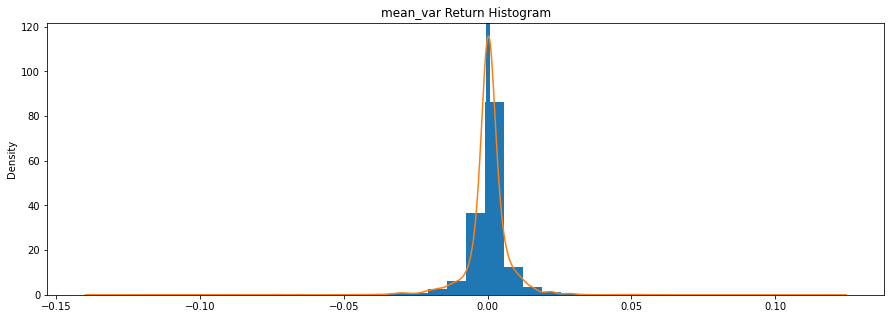

In [83]:
# Display strategy histogram
res.plot_histogram('fixed_weights')
res.plot_histogram('mean_var')

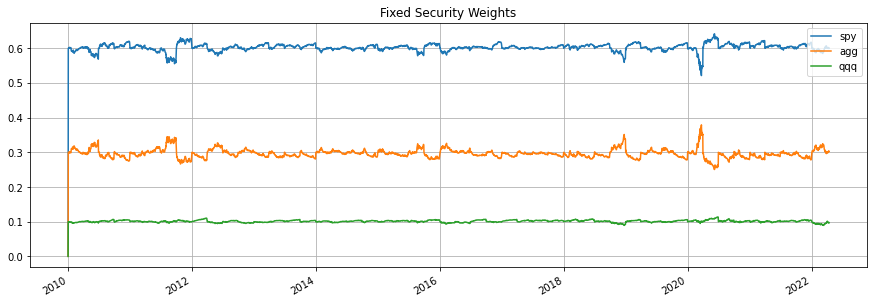

In [84]:
# Plot the security weights over time - fixed weights
res.plot_security_weights(grid=True, title='Fixed Security Weights')

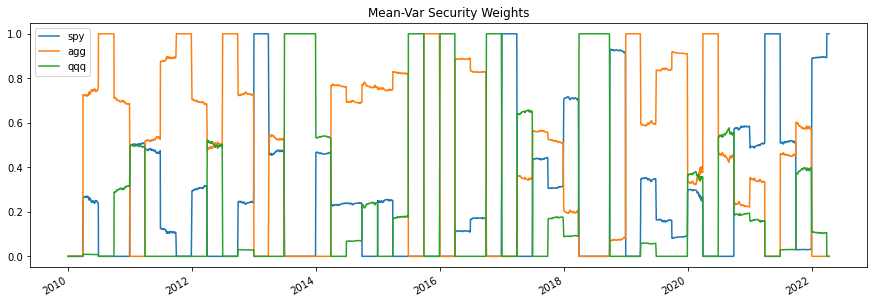

In [85]:
# Plot the security weights over time - Mean-Var optimization
res2 = bt.run(test2)
res2.plot_security_weights(title='Mean-Var Security Weights')

In [86]:
# Print strategy stats (set risk-free rate)
res.set_riskfree_rate(0.01)
res.display()

Stat                 fixed_weights    mean_var
-------------------  ---------------  ----------
Start                2010-01-03       2010-01-03
End                  2022-04-14       2022-04-14
Risk-free rate       1.00%            1.00%

Total Return         269.78%          142.18%
Daily Sharpe         0.87             0.61
Daily Sortino        1.34             0.90
CAGR                 11.24%           7.47%
Max Drawdown         -23.60%          -21.41%
Calmar Ratio         0.48             0.35

MTD                  -3.34%           -3.12%
3m                   -6.46%           -5.76%
6m                   -3.55%           -5.56%
YTD                  -8.53%           -8.59%
1Y                   2.47%            0.58%
3Y (ann.)            12.97%           6.23%
5Y (ann.)            12.15%           6.55%
10Y (ann.)           11.32%           7.68%
Since Incep. (ann.)  11.24%           7.47%

Daily Sharpe         0.87             0.61
Daily Sortino        1.34             0.90
Daily Me